In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
df=pd.read_csv('Boston-house-price-data.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
data=df

In [5]:
X=df.drop('MEDV',axis=1)
# Creates the feature matrix X by removing the 'MEDV' column from the DataFrame.
# axis=1 tells Pandas to drop a column (not a row).
# X now contains all input features (independent variables) used to predict house prices.

y=df['MEDV'].values.reshape(-1,1)

# Extracts the 'MEDV' column (the target variable) as a NumPy array.
# .values gets the underlying array, and .reshape(-1, 1) reshapes it into a 2D column vector.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Fit and transform training features.
# Only transform the test set to avoid data leakage.

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)
# Standardizes the target values (important for neural networks since 
# unscaled targets can lead to poor performance or instability).


In [7]:
from tensorflow.keras.models import Sequential
# Imports the Sequential model class, which allows you to 
# build a model layer-by-layer (i.e., a linear stack of layers).
from tensorflow.keras.layers import Dense
# Imports the Dense layer, which is a fully connected (feedforward) neural network layer.

In [8]:
model=Sequential()

In [9]:
model.add(Dense(128,input_shape=(13,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Compiles the model:
# adam optimizer (adaptive learning rate)
# mse (mean squared error) as the loss function (suitable for regression)
# mae (mean absolute error) as an additional evaluation metric.



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.6761 - mae: 0.6189 - val_loss: 0.3233 - val_mae: 0.3517
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2877 - mae: 0.3744 - val_loss: 0.2158 - val_mae: 0.2882
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2182 - mae: 0.3264 - val_loss: 0.2057 - val_mae: 0.3045
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1930 - mae: 0.2941 - val_loss: 0.1780 - val_mae: 0.2557
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1689 - mae: 0.2708 - val_loss: 0.1623 - val_mae: 0.2618
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1489 - mae: 0.2524 - val_loss: 0.1524 - val_mae: 0.2468
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1064 - mae: 0.2217 - val_loss: 0.1573 - val_mae: 0.2529
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0992 - mae: 0.2186 - val_loss: 0.1365 - val_mae: 0.2317
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

In [12]:
# Evaluate the model
output = model.evaluate(X_test, y_test)

# If you used 'loss' and 'mae' metrics during compilation
print(f"Test Loss: {output[0]:.4f}, Test MAE: {output[1]:.4f}")


# model.evaluate(X_test, y_test) returns a list of metric values: [loss, mae].
# output[0]: Mean Squared Error (loss).
# output[1]: Mean Absolute Error (your evaluation metric).

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1015 - mae: 0.2166
Test Loss: 0.1393, Test MAE: 0.2322


In [13]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")
# output[0] is the Mean Squared Error (MSE) from the test set.
# output[1] is the Mean Absolute Error (MAE) from the test set.

Mean Squared Error: 0.13932667672634125
Mean Absolute Error: 0.23216208815574646


In [14]:
y_pred=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [15]:
y_pred

array([[ 0.5014424 ],
       [ 1.0785722 ],
       [-0.90424293],
       [ 0.0743449 ],
       [-0.6932943 ],
       [-0.314598  ],
       [-0.3982968 ],
       [-0.8540569 ],
       [ 0.23533356],
       [-0.38379708],
       [-0.36208   ],
       [-0.2713416 ],
       [-2.364501  ],
       [-0.15885746],
       [-0.578567  ],
       [-0.02298433],
       [-0.4271037 ],
       [-1.1353239 ],
       [ 2.756852  ],
       [-1.1437044 ],
       [ 0.23500949],
       [ 0.3341708 ],
       [-0.92051524],
       [ 0.02153122],
       [-0.65102834],
       [-0.5224466 ],
       [-0.19593742],
       [-1.274994  ],
       [-0.279028  ],
       [-0.3973147 ],
       [ 0.13629806],
       [ 0.0553112 ],
       [-0.2539612 ],
       [ 0.34603235],
       [-0.88946277],
       [-0.6434121 ],
       [ 1.051797  ],
       [-0.36891225],
       [-0.142897  ],
       [ 0.1818641 ],
       [-0.31690294],
       [ 0.89646953],
       [ 3.2292948 ],
       [-0.4760484 ],
       [ 0.51904565],
       [-0

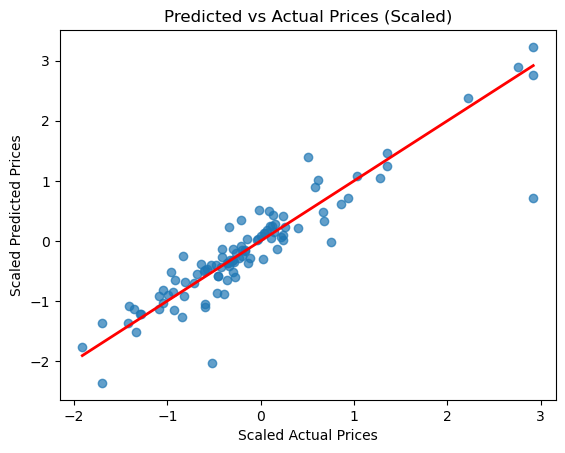

In [16]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual values in scaled form
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect prediction
plt.xlabel("Scaled Actual Prices")
plt.ylabel("Scaled Predicted Prices")
plt.title("Predicted vs Actual Prices (Scaled)")
plt.show()

# plt.scatter(y_test, y_pred, alpha=0.7):

# Plots the actual (y_test) vs predicted (y_pred) values in a scatter plot, where the opacity is set to 0.7 for better visualization.

# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2):

# Draws a red line representing the perfect prediction (where predicted values would be exactly equal to actual values).

# plt.xlabel("Scaled Actual Prices"):

# Sets the label for the x-axis.

# plt.ylabel("Scaled Predicted Prices"):

# Sets the label for the y-axis.

# plt.title("Predicted vs Actual Prices (Scaled)"):

# Sets the title for the plot.

# plt.show():

# Displays the plot.


